In [247]:

import pandas as pd
from sklearn import preprocessing


In [237]:
sentiment = pd.read_csv("../Data/SentimentValues.csv")
average_sentiment = sentiment.mean(axis = 1)


In [238]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
186,2020-08-02,0.085606,0.106282,-0.083450,-0.084410
187,2020-08-03,-0.001919,0.106439,-0.064120,0.231020
188,2020-08-04,0.049923,0.152813,0.070144,0.169833
189,2020-08-05,-0.117949,0.080866,-0.190700,-0.062538


---
Add Moving Average Here

In [239]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
186,2020-08-02,0.085606,0.106282,-0.083450,-0.084410
187,2020-08-03,-0.001919,0.106439,-0.064120,0.231020
188,2020-08-04,0.049923,0.152813,0.070144,0.169833
189,2020-08-05,-0.117949,0.080866,-0.190700,-0.062538


In [240]:
PublishedTimeColumn = sentiment.PublishedTime

In [241]:
rolling_df = pd.DataFrame(index = PublishedTimeColumn)
rolling_df

""
PublishedTime
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
...
2020-08-02
2020-08-03
2020-08-04


In [242]:
rolling_title

0           NaN
1     -0.189990
2     -0.199490
3     -0.178917
4     -0.215824
         ...   
186   -0.056454
187   -0.045978
188   -0.038707
189   -0.052404
190   -0.071435
Name: SentimentValueTitleVader, Length: 191, dtype: float64

In [243]:
rolling_title =  sentiment.rolling(14, min_periods= 2).mean().SentimentValueTitleVader
rolling_description = sentiment.rolling(14, min_periods= 2).mean().SentimentValueDescription
rolling_df = pd.DataFrame({"Title" : rolling_title , "Description" : rolling_description, "PublishedTime" :PublishedTimeColumn } ).set_index(["PublishedTime"])
rolling_df

,Title,Description
PublishedTime,,
2020-01-29,NaN,NaN
2020-01-30,-0.189990,0.096962
2020-01-31,-0.199490,0.067251
2020-02-01,-0.178917,0.084258
2020-02-02,-0.215824,0.093239
...,...,...
2020-08-02,-0.056454,0.074561
2020-08-03,-0.045978,0.082292
2020-08-04,-0.038707,0.086423


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

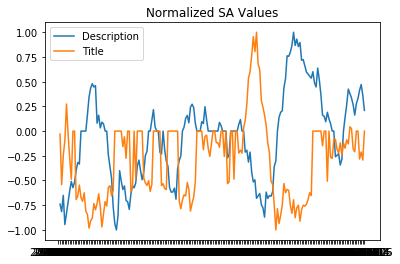

In [267]:
x = rolling_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1 ) )
x_scaled = min_max_scaler.fit_transform(x)
normalized_rolling = pd.DataFrame(x_scaled, columns=rolling_df.columns, index=rolling_df.index)

scalar = 4

description_threshold_top = normalized_rolling.Description.describe()["mean"] + normalized_rolling.Description.describe()["std"] / scalar
description_threshold_bottom = normalized_rolling.Description.describe()["mean"] - normalized_rolling.Description.describe()["std"] / scalar
title_threshold_top = normalized_rolling.Title.describe()["mean"] + normalized_rolling.Title.describe()["std"] / scalar
title_threshold_bottom = normalized_rolling.Title.describe()["mean"] - normalized_rolling.Title.describe()["std"] / scalar


normalized_rolling.loc[(normalized_rolling.Description < description_threshold_top) & (normalized_rolling.Description > description_threshold_bottom ),'Description']= 0
normalized_rolling.loc[(normalized_rolling.Title < title_threshold_top) & (normalized_rolling.Title > title_threshold_bottom ),'Title']= 0


plt.plot(normalized_rolling)
plt.legend(["Description" , "Title"])
plt.title("Normalized SA Values")
plt.savefig("remove_less_that_half_a_std.png")

<IPython.core.display.Javascript object>

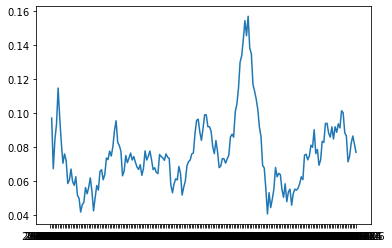

In [257]:
plt.plot(rolling_df.Description)


<IPython.core.display.Javascript object>

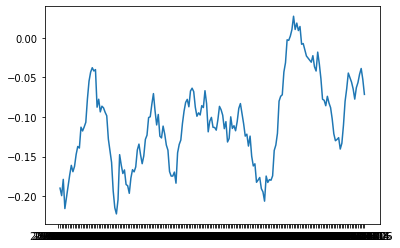

In [196]:
plt.plot(rolling_df.Title)


In [192]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
186,2020-08-02,0.085606,0.106282,-0.083450,-0.084410
187,2020-08-03,-0.001919,0.106439,-0.064120,0.231020
188,2020-08-04,0.049923,0.152813,0.070144,0.169833
189,2020-08-05,-0.117949,0.080866,-0.190700,-0.062538


---

In [193]:
threshold = 0.2
threshold_OG = 0.1

In [194]:
sentiment.loc[(sentiment.SentimentValueDescriptionVader < threshold) & (sentiment.SentimentValueDescriptionVader > -threshold ),'SentimentValueDescriptionVader']= 0
sentiment.loc[(sentiment.SentimentValueTitleVader < threshold) & (sentiment.SentimentValueTitleVader > -threshold ),'SentimentValueTitleVader']= 0
sentiment.loc[(sentiment.SentimentValueDescription < threshold_OG) & (sentiment.SentimentValueDescription > -threshold_OG ),'SentimentValueDescription']= 0
sentiment.loc[(sentiment.SentimentValueTitle < threshold_OG) & (sentiment.SentimentValueTitle > -threshold_OG ),'SentimentValueTitle']= 0
# sentiment.loc[(sentiment.SentimentValueTitleVaderRolling < threshold_OG) & (sentiment.SentimentValueTitleVaderRolling > -threshold_OG ),'SentimentValueTitleVaderRolling']= 0
# sentiment.loc[(sentiment.SentimentValueDescriptionVaderRolling < threshold_OG) & (sentiment.SentimentValueTitleVaderRolling > -threshold_OG ),'SentimentValueDescriptionVaderRolling']= 0

average_sentiment = sentiment.mean(axis = 1)
# rolling_df["Average_of_OG_column_sentiment"] = average_sentiment
# rolling_df.insert(1,"Average_column_sentiment",average_sentiment)

In [195]:
rolling_df

,Title,Description
PublishedTime,,
2020-01-29,NaN,NaN
2020-01-30,-0.189990,0.096962
2020-01-31,-0.199490,0.067251
2020-02-01,-0.178917,0.084258
2020-02-02,-0.215824,0.093239
...,...,...
2020-08-02,-0.056454,0.074561
2020-08-03,-0.045978,0.082292
2020-08-04,-0.038707,0.086423


In [137]:
sum_sentiment = sentiment.sum(axis = 1)


In [138]:
sum_sentiment

0     -0.030536
1     -0.249390
2     -0.218489
3      0.383067
4     -0.941333
         ...   
186    0.106282
187    0.337459
188    0.152813
189   -0.117949
190   -0.661780
Length: 191, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

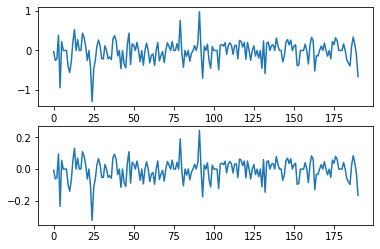

In [139]:
plt.subplot(2,1,1)
plt.plot(sum_sentiment)

plt.subplot(2,1,2)
plt.plot(average_sentiment)

<IPython.core.display.Javascript object>

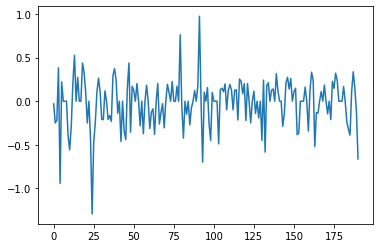

In [142]:

plt.plot(sum_sentiment)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Unprocessed SA Values')

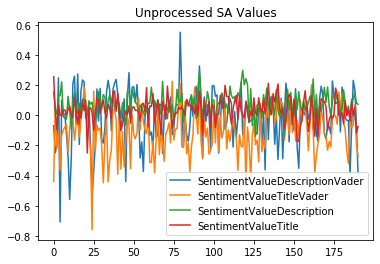

In [268]:
plt.plot(sentiment.SentimentValueDescriptionVader.values)
plt.plot(sentiment.SentimentValueTitleVader.values)
plt.plot(sentiment.SentimentValueDescription.values)
plt.plot(sentiment.SentimentValueTitle.values)
plt.legend(["SentimentValueDescriptionVader", "SentimentValueTitleVader", "SentimentValueDescription" , "SentimentValueTitle"])
plt.title("Unprocessed SA Values")

<IPython.core.display.Javascript object>

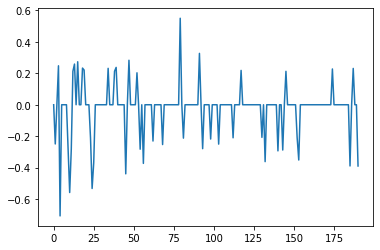

In [143]:
plt.plot(sentiment.SentimentValueDescriptionVader.values)

<IPython.core.display.Javascript object>

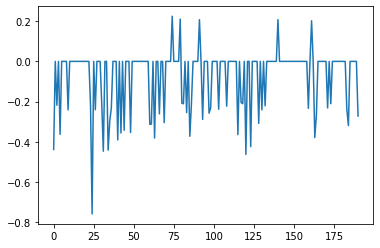

In [144]:
plt.plot(sentiment.SentimentValueTitleVader.values)

<IPython.core.display.Javascript object>

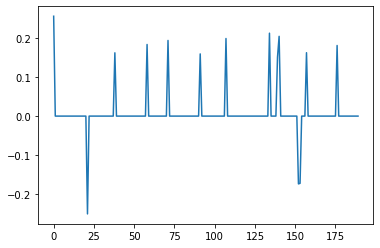

In [248]:
plt.plot(sentiment.SentimentValueTitle.values)

<IPython.core.display.Javascript object>

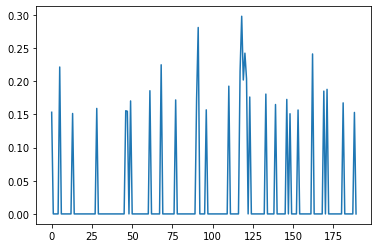

In [249]:
plt.plot(sentiment.SentimentValueDescription.values)

<IPython.core.display.Javascript object>

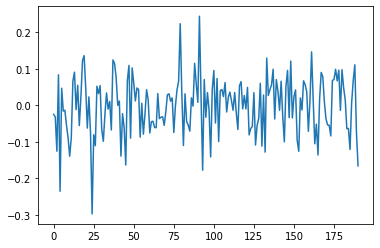

In [269]:
plt.plot(average_sentiment)

In [221]:
sentiment.iloc[25]

PublishedTime                     2020-02-23
SentimentValueTitle                        0
SentimentValueDescription                  0
SentimentValueTitleVader                   0
SentimentValueDescriptionVader       -0.3698
Name: 25, dtype: object

In [134]:
### OG generally more positive, vader more negative

In [145]:
dataframe = pd.DataFrame(average_sentiment)

In [146]:
dataframe

,0
0,-0.007634
1,0.000000
2,-0.023295
3,0.050654
4,-0.235333
...,...
179,0.000000
180,0.000000
181,0.027569
182,0.043623


In [147]:

dataframe.describe()

,0
count,184.000000
mean,0.006731
std,0.059850
min,-0.301545
25%,-0.015323
50%,0.017967
75%,0.043124
max,0.191619
